# Credit_Card_Fraud_Detection


# Import libraries 

In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# Data Exploration

## Read DF

In [2]:
df = pd.read_csv('/root/code/MarceloDataLab/Credit_Card_Fraud_Detection/Data/db/creditcard_2023.csv')

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [6]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [7]:
df_shuffled.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,200964,1.702117,-0.403181,-0.074595,-0.140757,0.535754,0.105630,0.654433,-0.213228,0.447075,...,-0.064705,0.371971,-0.101753,-0.648164,0.704840,-1.210121,-0.261880,-0.272299,9995.68,0
1,200827,0.017336,-1.022493,0.678888,-1.953261,0.283408,1.163589,0.405484,-0.075226,2.074741,...,-0.047814,0.999365,0.965892,-2.562407,-1.537142,-0.581277,-0.212575,-0.980113,20813.00,0
2,429088,0.573946,0.279732,-0.700993,0.793936,-0.395952,-1.201185,-0.480733,0.074818,0.352607,...,0.122986,-0.041806,0.731041,0.878569,-3.003761,0.706920,0.530474,0.232527,20376.48,1
3,231621,0.276903,-0.119256,0.305943,-0.907961,0.668058,-0.022060,0.822152,-0.176067,0.474526,...,-0.243989,-0.779957,0.070338,1.190448,-0.750261,0.270415,0.026863,0.102683,15278.59,0
4,125048,-0.652396,0.312563,0.230200,-0.125134,-0.230548,0.093272,0.167643,0.298779,0.133431,...,-0.010291,0.649701,0.141943,0.900848,-0.065894,-0.494545,-0.417966,-0.909314,8454.17,0


## Split df in Test/val/train

In [8]:
X = df_shuffled.drop('Class', axis=1)

In [9]:
y = df_shuffled['Class']

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [12]:
print(f"""
X_train: {X_train.shape}
y_train: {y_train.shape}
X_val: {X_val.shape}
y_val: {y_val.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
""")


X_train: (341178, 30)
y_train: (341178,)
X_val: (113726, 30)
y_val: (113726,)
X_test: (113726, 30)
y_test: (113726,)



Conjunto de Treino (Train): Usado para treinar o modelo. Representa a maior parte do conjunto de dados.

Conjunto de Validação (val): Usado para ajustar os hiperparâmetros do modelo e para fazer seleção de modelos durante o desenvolvimento. Permite avaliar o modelo durante o treinamento sem tocar nos dados de teste.

Conjunto de Teste (test): Usado para avaliar a performance do modelo após o treinamento ter sido concluído. Deve ser um conjunto de dados que o modelo nunca viu durante o treinamento ou validação.

# Data cleaning

## Scalling

In [13]:
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Feature selection

## feature correlation 

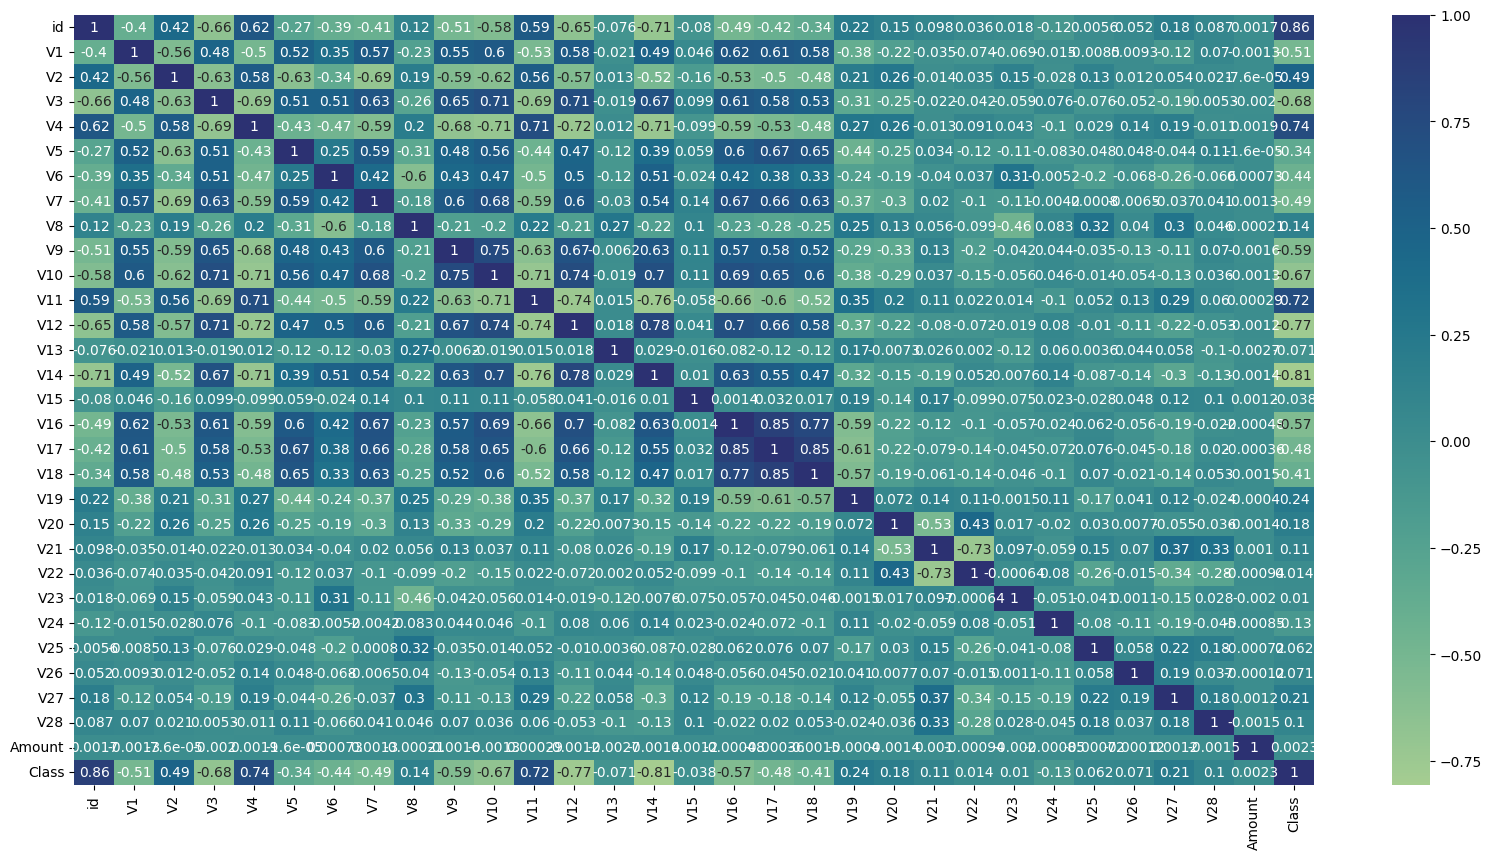

In [14]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(df_shuffled.corr(),cmap='crest',annot=True)
plt.show()

## Modelling

### model

In [25]:
model = SGDClassifier()

### Validation  

In [16]:
scores = cross_val_score(model, X_val_scaled, y_val, cv=10, scoring='accuracy')
print(f'Acurácia média da validação cruzada: {np.mean(scores)}')

Acurácia média da validação cruzada: 0.9980919072666536


### Learning Curves

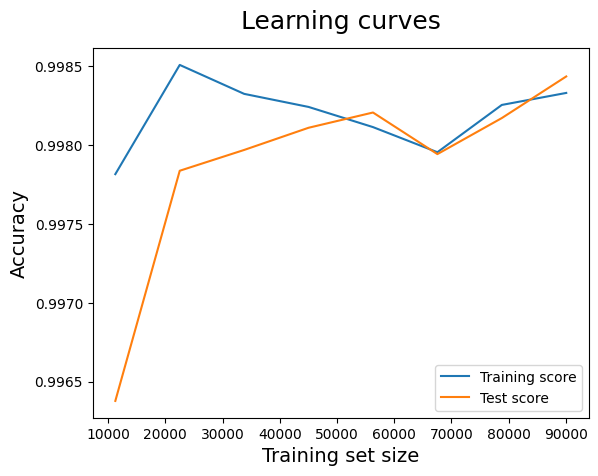

In [17]:
train_sizes_loop = [i for i in range(1126, 113727, 1126)]
selected_positions = [10, 20, 30, 40, 50, 60, 70, 80]
train_size = [train_sizes_loop[i - 1] for i in selected_positions]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_val_scaled, y=y_val, train_sizes=train_size, cv=5, scoring='accuracy')


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# Pipeline & Train model

In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(random_state=42))
])

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SGDClassifier(random_state=42))])

In [20]:
accuracy = pipeline.score(X_test, y_test)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9983556970261858


In [21]:
def detector(row):
    y_pred = pipeline.predict(row)
    if y_pred[0] == 1:
        return 'this transaction is fraudulent'
    else:
        return 'this transaction is Not fraudulent'

In [22]:
random_row = X_test.sample(n=1)

In [26]:
detector(random_row)

'this transaction is fraudulent'